In [1]:
from strategy.Manager import CapWeight
from strategy.Manager import MaxSharpeRatioPortfolio
import pandas as pd

In [2]:
cw = CapWeight(20250331)
cw.path_strategy("caps")

'data/strategy/caps'

In [3]:
[old, df_wgts] = cw.calculate_weights()
df_wgts

,Symbol,Weights_old,Weights_new
0,AC.PA,0.004179,0.004217
1,AI.PA,0.043741,0.043642
2,AIR.PA,0.047099,0.046501
3,MT.AS,0.007946,0.008246
4,CS.PA,0.037652,0.037602
5,BNP.PA,0.035001,0.034722
6,EN.PA,0.006162,0.006051
7,CAP.PA,0.009370,0.009575
8,CA.PA,0.003748,0.003784
9,ACA.PA,0.021579,0.021612


In [4]:
msr = MaxSharpeRatioPortfolio(20250331)
[prior, df_weights] = msr.calculate_weights()
df_weights

,Asset,Weight_Sample,Weight_LW
0,AC.PA,0.000000,0.000000
1,ACA.PA,0.000000,0.000000
2,AI.PA,0.000000,0.000000
3,AIR.PA,0.000000,0.000000
4,BN.PA,0.176843,0.121128
5,BNP.PA,0.000000,0.000000
6,BVI.PA,0.000000,0.000000
7,CA.PA,0.000000,0.000000
8,CAP.PA,0.000000,0.000000
9,CS.PA,0.000000,0.066835


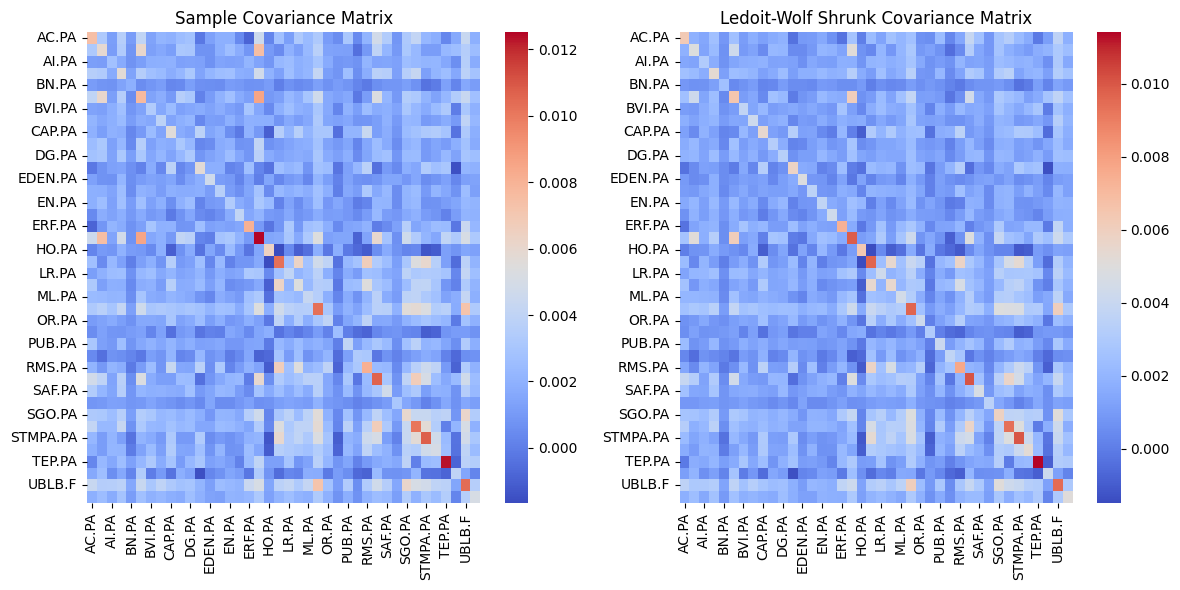

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(msr.df_sample_cov_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Sample Covariance Matrix")

# Plot the Ledoit-Wolf shrunk covariance matrix
plt.subplot(1, 2, 2)
sns.heatmap(msr.df_LedoitWolf_cov_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Ledoit-Wolf Shrunk Covariance Matrix")

plt.tight_layout()
plt.show()

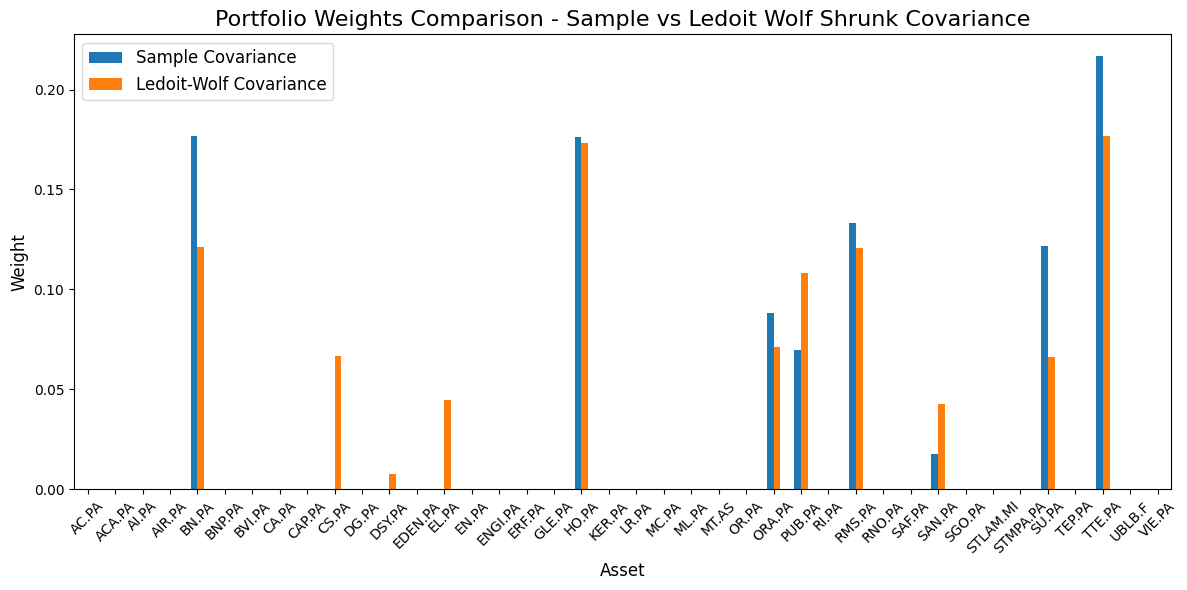

In [6]:
[prior, df_weights] = msr.calculate_weights()
df_weights

import matplotlib.pyplot as plt

# Set the index to 'Asset' for easier plotting
df_weights.set_index('Asset', inplace=True)

# Plot the weights
df_weights.plot(kind='bar', figsize=(12, 6))

# Add labels and title
plt.title('Portfolio Weights Comparison - Sample vs Ledoit Wolf Shrunk Covariance', fontsize=16)
plt.ylabel('Weight', fontsize=12)
plt.xlabel('Asset', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Sample Covariance', 'Ledoit-Wolf Covariance'], fontsize=12)

# Show the plot
plt.tight_layout()

plt.show()

In [7]:
# sanity check
sum(df_weights.loc[:,["Weight_Sample","Weight_LW"]].values)

array([1., 1.])